**PROYECTO FINAL 
ANÁLISIS DE VENTAS DE VIDEOJUEGOS**

Objetivo del proyecto:

Analizar datos de ventas de videojuegos para identificar patrones de ventas, géneros más populares y tendencias por consola y año, permitiendo tomar decisiones informadas sobre estrategias de desarrollo y comercialización.

In [2]:
#Librerías 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

#Configuración de los gráficos
plt.style.use("ggplot")

#Mostrar más columnas
pd.set_option("display.max_columns", 20)

In [3]:
#Ruta del archivo CSV
ruta_csv = "Video_Games.csv"


#Cargar
df = pd.read_csv(ruta_csv)

#Mostrar las primeras filas
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Tamaño del dataframe
print("Shape del DataFrame:", df.shape)

#Nombres de las columnas
print("\nColumnas:")
print(df.columns)

#Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

#Información general
print("\nInfo del DataFrame:")
df.info()

Shape del DataFrame: (16928, 17)

Columnas:
Index(['index', 'Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher',
       'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
       'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer',
       'Rating'],
      dtype='object')

Tipos de datos:
index                int64
Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Developer           object
Rating              object
dtype: object

Info del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------        

**LIMPIEZA Y PREPARACION DE DATOS**

Año de lanzamiento

Género (Genre)

Plataforma (Platform)

Ventas globales (Global_Sales) y por región

Eliminar columnas innecesarias

Eliminar filas sin datos clave, año, género, plataforma o ventas

Convertir el año a entero

In [5]:
#Eliminar columna index si existe
if 'index' in df.columns:
    df = df.drop(columns=['index'])

#Eliminar filas con valores nulos en columnas clave
columnas_clave = ["Year_of_Release", "Genre", "Platform", "Global_Sales"]
df = df.dropna(subset=columnas_clave)

#Convertir el año a entero
df["Year_of_Release"] = df["Year_of_Release"].astype(int)

#Comprobar el resultado
print("Shape después de limpiar:", df.shape)
df[["Name", "Platform", "Year_of_Release", "Genre", "Global_Sales"]].head()

Shape después de limpiar: (16653, 16)


,Name,Platform,Year_of_Release,Genre,Global_Sales
0,Wii Sports,Wii,2006,Sports,82.53
1,Super Mario Bros.,NES,1985,Platform,40.24
2,Mario Kart Wii,Wii,2008,Racing,35.52
3,Wii Sports Resort,Wii,2009,Sports,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37


In [6]:
#Número total de juegos
total_juegos = len(df)

#Ventas totales globales
ventas_globales_totales = df["Global_Sales"].sum()

#Ventas promedio por juego
ventas_promedio_juego = df["Global_Sales"].mean()

print(f"Cantidad de juegos en el dataset: {total_juegos}")
print(f"Ventas globales totales: {ventas_globales_totales:.2f} millones de copias")
print(f"Ventas promedio por juego: {ventas_promedio_juego:.2f} millones de copias")

Cantidad de juegos en el dataset: 16653
Ventas globales totales: 9029.14 millones de copias
Ventas promedio por juego: 0.54 millones de copias


**REGIONES CON MAS VENTAS DE JUEGOS**

Ventas totales por región (en millones):
NA_Sales        4447.55
EU_Sales        2460.21
JP_Sales        1315.90
Other_Sales      801.30
Global_Sales    9029.14
dtype: float64

Porcentaje de ventas por región:
NA_Sales         49.3
EU_Sales         27.2
JP_Sales         14.6
Other_Sales       8.9
Global_Sales    100.0
dtype: float64


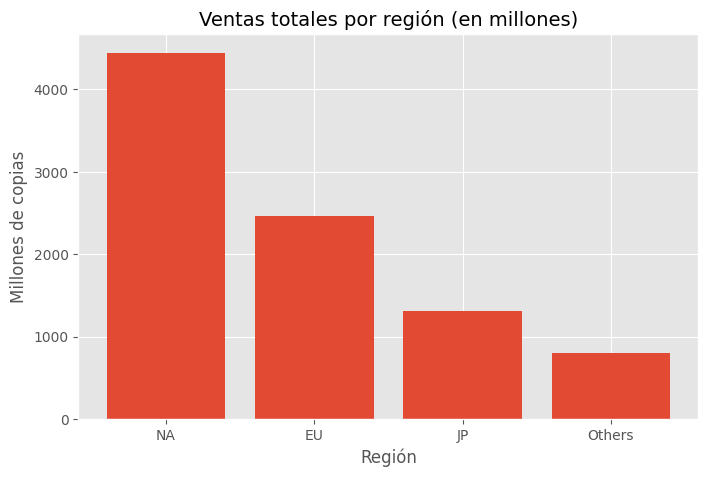

In [7]:
columnas_regiones = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
suma_regiones = df[columnas_regiones].sum()
porcentaje_regiones = (suma_regiones / suma_regiones["Global_Sales"]) * 100

print("Ventas totales por región (en millones):")
print(suma_regiones)

print("\nPorcentaje de ventas por región:")
print(porcentaje_regiones.round(1))


df_regiones = pd.DataFrame({
    "Region": ["NA", "EU", "JP", "Others"],
    "Ventas": [
        suma_regiones["NA_Sales"],
        suma_regiones["EU_Sales"],
        suma_regiones["JP_Sales"],
        suma_regiones["Other_Sales"]
    ]
})

plt.figure(figsize=(8,5))

plt.bar(
    df_regiones["Region"],
    df_regiones["Ventas"]
)

plt.title("Ventas totales por región (en millones)", fontsize=14)
plt.ylabel("Millones de copias", fontsize=12)
plt.xlabel("Región", fontsize=12)

plt.show()

**ANÁLISIS POR GENERO**

Qué géneros venden más en total

Cuántos juegos hay por género

Cuánto vende un juego promedio de cada género

In [8]:
ventas_por_genero = df.groupby("Genre")["Global_Sales"].agg(["sum", "count", "mean"])
ventas_por_genero = ventas_por_genero.sort_values("sum", ascending=False)

ventas_por_genero

,sum,count,mean
Genre,,,
Action,1743.47,3347,0.520905
Sports,1329.00,2338,0.568435
Shooter,1075.56,1320,0.814818
Role-Playing,954.49,1501,0.635903
Platform,848.51,894,0.949116
Misc,817.95,1744,0.469008
Racing,752.10,1242,0.605556
Fighting,463.06,851,0.544136
Simulation,392.10,864,0.453819


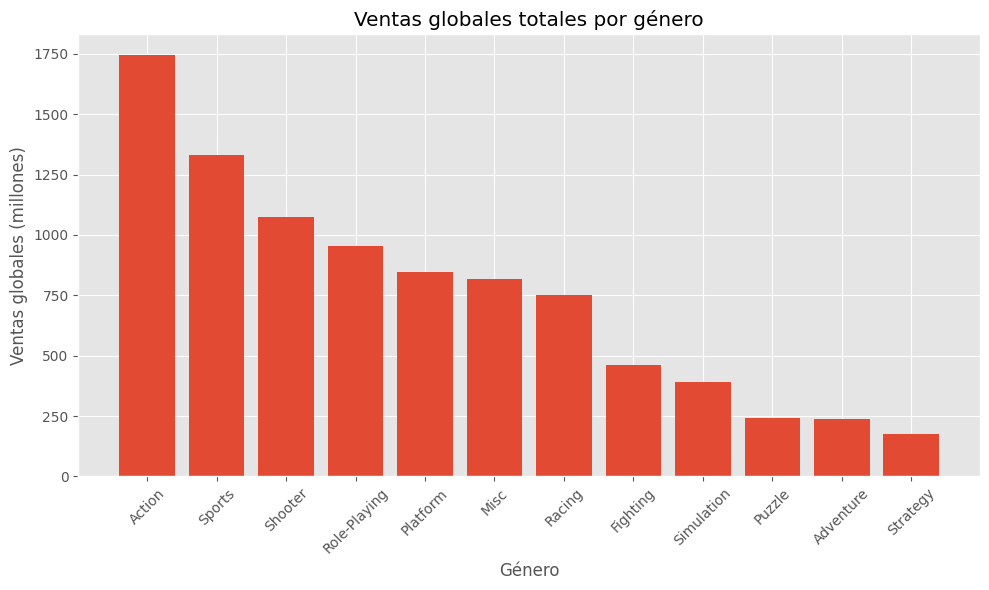

In [9]:
plt.figure(figsize=(10,6))

plt.bar(
    ventas_por_genero.index,
    ventas_por_genero["sum"]
)

plt.xticks(rotation=45)
plt.title("Ventas globales totales por género")
plt.ylabel("Ventas globales (millones)")
plt.xlabel("Género")
plt.tight_layout()
plt.show()

**ANÁLISIS POR CONSOLA**


Qué consolas han vendido más juegos en total

Cuántos juegos hay por consola

Ventas promedio por juego en cada plataforma

In [10]:
ventas_por_plataforma = df.groupby("Platform")["Global_Sales"].agg(["sum","count","mean"])
ventas_por_plataforma = ventas_por_plataforma.sort_values("sum", ascending=False)

# Mostrar las 10 plataformas más fuertes
ventas_por_plataforma.head(10)

,sum,count,mean
Platform,,,
PS2,1260.27,2153,0.585355
X360,978.12,1250,0.782496
PS3,953.81,1333,0.715536
Wii,920.88,1303,0.706738
DS,809.88,2133,0.379691
PS,756.61,1207,0.626852
PS4,324.48,399,0.813233
GBA,322.17,828,0.389094
PSP,293.51,1200,0.244592


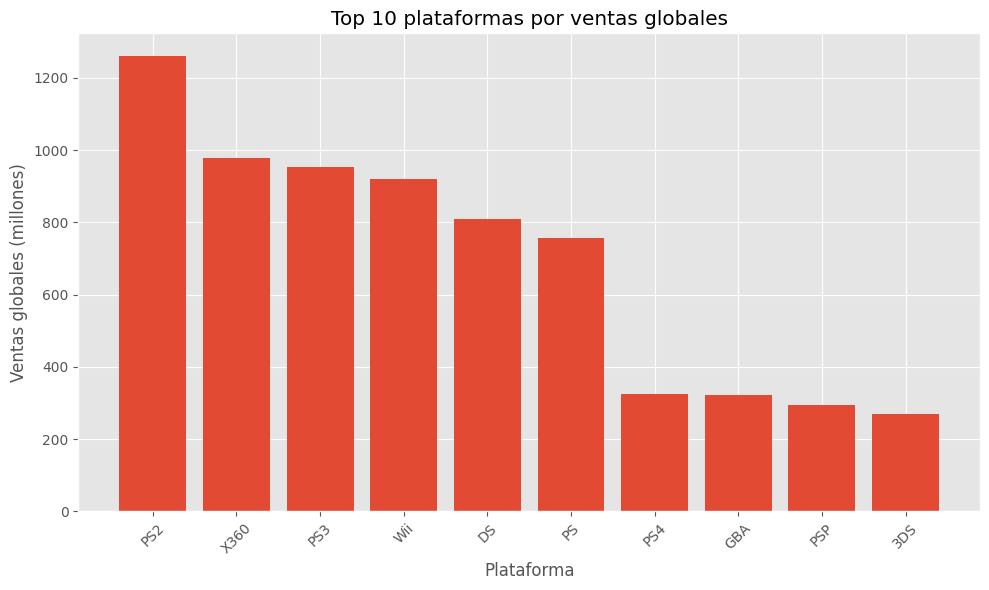

In [11]:
top_n = 10
plt.figure(figsize=(10,6))

plt.bar(
    ventas_por_plataforma.head(top_n).index,
    ventas_por_plataforma.head(top_n)["sum"]
)

plt.xticks(rotation=45)
plt.title(f"Top {top_n} plataformas por ventas globales")
plt.ylabel("Ventas globales (millones)")
plt.xlabel("Plataforma")
plt.tight_layout()
plt.show()


**TOP 20 DE LOS JUEGOS MAS VENDIDOS**

In [12]:
top_20 = df[["Name", "Platform", "Year_of_Release", "Genre", "Global_Sales"]]

top_20 = top_20.sort_values("Global_Sales", ascending=False).head(20)

#Reiniciar el índice y empezar desde 1
top_20 = top_20.reset_index(drop=True)
top_20.index = top_20.index + 1

top_20

,Name,Platform,Year_of_Release,Genre,Global_Sales
1,Wii Sports,Wii,2006,Sports,82.53
2,Super Mario Bros.,NES,1985,Platform,40.24
3,Mario Kart Wii,Wii,2008,Racing,35.52
4,Wii Sports Resort,Wii,2009,Sports,32.77
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,31.37
6,Tetris,GB,1989,Puzzle,30.26
7,New Super Mario Bros.,DS,2006,Platform,29.80
8,Wii Play,Wii,2006,Misc,28.92
9,New Super Mario Bros. Wii,Wii,2009,Platform,28.32
10,Duck Hunt,NES,1984,Shooter,28.31


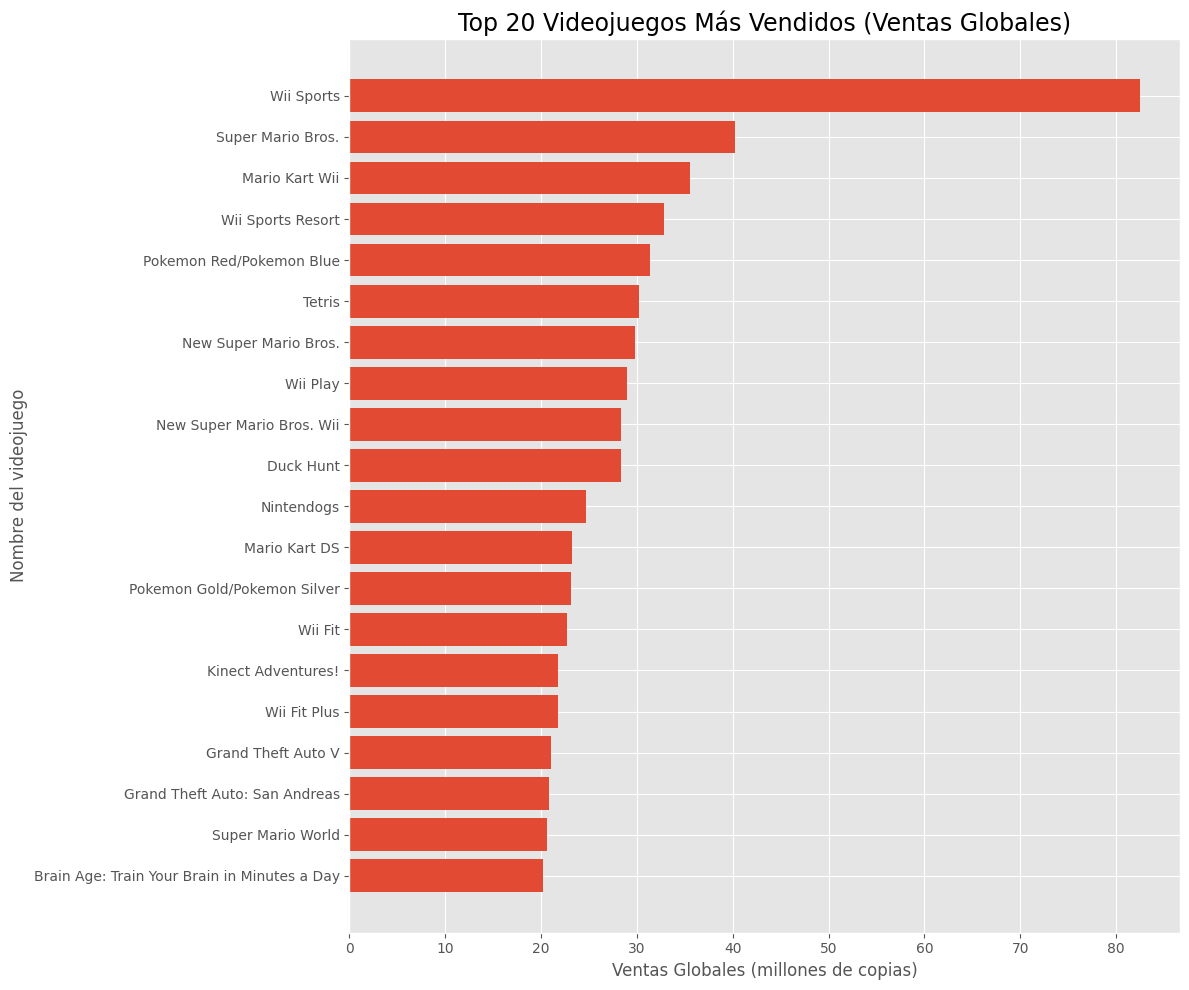

In [13]:
#Gráfico del Top 20 de videojuegos más vendidos
top_20_plot = top_20.sort_values("Global_Sales", ascending=True)

plt.figure(figsize=(12,10))

# Crear gráfico de barras horizontales
plt.barh(
    top_20_plot["Name"],
    top_20_plot["Global_Sales"]
)

plt.title("Top 20 Videojuegos Más Vendidos (Ventas Globales)", fontsize=17)
plt.xlabel("Ventas Globales (millones de copias)")
plt.ylabel("Nombre del videojuego")

plt.tight_layout()
plt.show()


**CONCLUCIONES** 

El dataset contiene 16.653 juegos con información histórica de ventas globales

Se observan picos de ventas alrededor de los años 2006–2010, que coincide con la generación de consolas como Wii, Xbox 360 y PS3

Los géneros con mayores ventas globales son Action, Sports, Shooter y Role-Playing, aunque algunos géneros como Platform tienen ventas promedio muy altas por juego

Las plataformas con más ventas totales son PS2, Xbox 360, PS3, Wii y DS, lo que muestra la importancia de estas consolas en la historia del mercado

El análisis por región muestra que Norteamérica y Europa concentran la mayor parte del consumo, con Japón también siendo un mercado fuerte para ciertos géneros como RPG

Interaccion con el usuario

In [14]:
print("=== CONSULTA DE VIDEOJUEGOS ===")
print("1. Ver juegos de un año")
print("2. Ver top juegos por plataforma")

opcion = input("Seleccione una opción (1 o 2): ")

#JUEGOS POR AÑO
if opcion == "1":
    anio = int(input("Ingrese el año: "))
    juegos = df[df["Year_of_Release"] == anio]

    if juegos.empty:
        print(f"No hay juegos del año {anio}.")
    else:
        print(f"\nJuegos del año {anio}:")
        for i, fila in juegos.head(5).iterrows():
            print("-", fila["Name"])

#JUEGOS POR PLATAFORMA
elif opcion == "2":
    plataforma = input("Ingrese la plataforma (ej: PS4): ").upper()
    datos = df[df["Platform"] == plataforma]

    if datos.empty:
        print("No hay juegos de esa plataforma.")
    else:
        print(f"\nTop 10 juegos de {plataforma}:")
        for i, fila in datos.sort_values("Global_Sales", ascending=False).head(10).iterrows():
            print(f"- {fila['Name']} ({fila['Global_Sales']} millones)")

#OPCIÓN NO VÁLIDA
else:
    print("Opción no válida.")


=== CONSULTA DE VIDEOJUEGOS ===
1. Ver juegos de un año
2. Ver top juegos por plataforma
Opción no válida.
